              unix        date    symbol  ...  Volume BTC  Volume USDT  tradecount
1396  1.502928e+09  2017-08-17  BTC/USDT  ...      647.86   2812379.11         NaN
1395  1.503014e+09  2017-08-18  BTC/USDT  ...     1178.07   4994493.56         NaN
1394  1.503101e+09  2017-08-19  BTC/USDT  ...      371.15   1508239.39         NaN
1393  1.503187e+09  2017-08-20  BTC/USDT  ...      463.54   1915636.35         NaN
1392  1.503274e+09  2017-08-21  BTC/USDT  ...      685.12   2770592.06         NaN
1391  1.503360e+09  2017-08-22  BTC/USDT  ...      939.91   3648726.50         NaN
1390  1.503446e+09  2017-08-23  BTC/USDT  ...      980.50   4062506.52         NaN
1389  1.503533e+09  2017-08-24  BTC/USDT  ...      770.46   3225405.80         NaN
1388  1.503619e+09  2017-08-25  BTC/USDT  ...      563.36   2440323.79         NaN
1387  1.503706e+09  2017-08-26  BTC/USDT  ...      225.76    967753.32         NaN
1386  1.503792e+09  2017-08-27  BTC/USDT  ...      347.47   1507589.96         NaN
1385

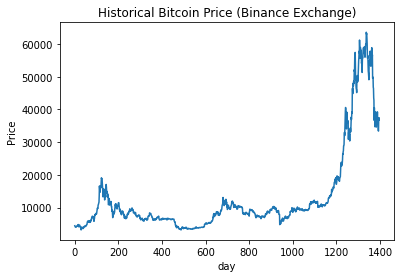

X:(1376, 20),y:(1376,)
X_train:(1348, 20),y_train:(1348,),X_test:(28, 20),y_test(28,)
X_train:(1348, 20),y_train:(1348, 1),X_test:(28, 20),y_test(28, 1)
Epoch 1/30
1348/1348 [==============================] - 18s 1ms/step - loss: 0.0019
Epoch 2/30
1348/1348 [==============================] - 2s 1ms/step - loss: 8.4470e-04
Epoch 3/30
1348/1348 [==============================] - 2s 1ms/step - loss: 6.9066e-04
Epoch 4/30
1348/1348 [==============================] - 2s 1ms/step - loss: 5.2459e-04
Epoch 5/30
1348/1348 [==============================] - 2s 1ms/step - loss: 5.3226e-04
Epoch 6/30
1348/1348 [==============================] - 2s 1ms/step - loss: 4.2587e-04
Epoch 7/30
1348/1348 [==============================] - 2s 1ms/step - loss: 4.3047e-04
Epoch 8/30
1348/1348 [==============================] - 2s 1ms/step - loss: 4.1819e-04
Epoch 9/30
1348/1348 [==============================] - 2s 1ms/step - loss: 3.1563e-04
Epoch 10/30
1348/1348 [==============================] - 2s 1ms/ste

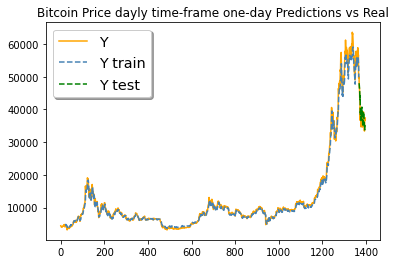

array([[48012.684],
       [47510.938],
       [46681.496],
       [45525.88 ],
       [43021.54 ],
       [44125.453],
       [38197.004],
       [39429.484],
       [37337.16 ],
       [36357.797],
       [36471.566],
       [37639.2  ],
       [38016.5  ],
       [40718.36 ],
       [39904.97 ],
       [38022.2  ],
       [37393.836],
       [34895.793],
       [36835.777],
       [37028.938],
       [39001.348],
       [39293.492],
       [39028.71 ],
       [36700.895],
       [35493.555],
       [34302.457],
       [33726.668],
       [35264.42 ]], dtype=float32)

In [3]:
# LSTM  to predict active price.
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 
 
 # The first thing we want to do is import the Pandas library and set the filepath to our data file
import pandas as pd
filepath = "https://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_d.csv"
 
import ssl  # we need to import this library and tweak one setting due to fact we use HTTPS certificate(s)
ssl._create_default_https_context = ssl._create_unverified_context
 
# Now we want to create a dataframe and use Pandas' to_csv function to read in our file
df = pd.read_csv(filepath, skiprows=1)  # we use skiprows parameter because first row contains our web address
 
 # Now that we have loaded our data into the dataframe, we can preview it using the print & .head() function
df = df.sort_values(['date'], ascending=[True])
print(df.head(15))  # print first 15 lines of dataframe

def prediction_simple(df,column_to_predict,epochs=30,look_back=20,look_forward=1,test_size=0.02, batch_size=1):

  #### DATA PREPARATION ####

  # Selecction of variables X and Y
  df=df
  dataset = df.iloc[:,column_to_predict].values
  plt.plot(dataset)
  plt.xlabel("day")
  plt.ylabel("Price")
  plt.title("Historical Bitcoin Price (Binance Exchange)")
  plt.show()
  # scaling 
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = dataset.reshape(-1,1)
  dataset = dataset.astype("float32")
  dataset = scaler.fit_transform(dataset)
  def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
  def split_data(X, y, test_size):
    pos = int(round(len(X) * (1-test_size)))
    X_train, y_train = X[:pos], y[:pos]
    X_test, y_test = X[pos:], y[pos:]
    return X_train, y_train, X_test, y_test
  X, y = create_dataset(dataset, look_back)
  print("X:{},y:{}".format(X.shape, y.shape))
  X_train, y_train, X_test, y_test = split_data(X, y, test_size)
  print("X_train:{},y_train:{},X_test:{},y_test{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))
  # reshape
  y = y.reshape(-1,1)
  y_train=y_train.reshape(-1,1)
  y_test=y_test.reshape(-1,1)
  print("X_train:{},y_train:{},X_test:{},y_test{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))
  # reshape input to be [samples, time steps, features]
  X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
  X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
  
  #### CREATING LSTM MODEL ####

  # model
  model = Sequential()
  model.add(LSTM(4, input_shape=(1, look_back)))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
  
  #### EXECUTING THE MODEL ####
   
  # predictions
  trainPredict = model.predict(X_train)
  testPredict = model.predict(X_test)
  # reshape
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform(y_train)
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform(y_test)
  # metrics
  trainY=trainY.reshape(1,-1)
  testY = testY.reshape(1,-1)
  # calculate root mean squared error
  trainSctrainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
  print('Train Score: %.2f RMSE' % (trainSctrainScore))
  testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
  print('Test Score: %.2f RMSE' % (testScore))

  # PLOT THE RESULTS #

  trainPredictPlot = np.empty_like(dataset)
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
  # shift test predictions for plotting
  testPredictPlot = np.empty_like(dataset)
  testPredictPlot[:, :] = np.nan
  testPredictPlot[len(trainPredict)+(look_back):len(dataset)-1, :] = testPredict
  # plot baseline and predictions
  fig, ax = plt.subplots()
  ax.plot(scaler.inverse_transform(dataset), label='Y', color = 'orange')
  ax.plot(trainPredictPlot, 'k--', label='Y train', color = 'steelblue')
  plt.plot(testPredictPlot, 'k--', label='Y test', color = 'green')
  legend = ax.legend(loc='best', shadow=True, fontsize='x-large')
  plt.title("Bitcoin Price dayly time-frame one-day Predictions vs Real")
  plt.show()

  return(testPredict)
column_to_predict = 3
prediction_simple(df,column_to_predict)